<a href="https://colab.research.google.com/github/BhanuDanda/NLP/blob/main/Project(10A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

**04/08/2025**

You're working on an HR analytics tool. The goal is to preprocess text from resumes to extract relevant skills, using clean and consistent tokens.

Use the Resume Dataset or simulated resumes.

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:

·       Clean special characters and digits

·       Tokenize and stem

·       Remove stop words

·       Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:

·       Tokenize and lemmatize

·       Filter tokens: only include alphabetic nouns and verbs

·       Extract top 10 frequent lemmas

In [ ]:

!pip install spacy

In [ ]:
import pandas as pd
import spacy
df=pd.read_csv('/content/legal_text_classification[1].csv')
pln=spacy.load('en_core_web_sm')
print(df)

         case_id   case_outcome  \
0          Case1          cited   
1          Case2          cited   
2          Case3          cited   
3          Case4          cited   
4          Case5          cited   
...          ...            ...   
24980  Case25203          cited   
24981  Case25204          cited   
24982  Case25205          cited   
24983  Case25206  distinguished   
24984  Case25207  distinguished   

                                              case_title  \
0      Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1      Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...   
2      Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
3      Dais Studio Pty Ltd v Bullett Creative Pty Ltd...   
4      Dr Martens Australia Pty Ltd v Figgins Holding...   
...                                                  ...   
24980  Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...   
24981  Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...   
24982  Spiel v Commodity Brokers Austra

In [ ]:
d=df['case_text'].iloc[0]
print(d)

Ordinarily that discretion will be exercised so that costs follow the event and are awarded on a party and party basis. A departure from normal practice to award indemnity costs requires some special or unusual feature in the case: Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Ltd (No 2) [2002] FCA 224 ; (2002) 190 ALR 121 at [11] (Weinberg J) citing Colgate Palmolive Co v Cussons Pty Ltd (1993) 46 FCR 225 at 233 (Sheppard J).


In [ ]:
doc=pln(d)
for i in doc.sents:
  print(i.text)
for i in doc:
  print(i.text)

Ordinarily that discretion will be exercised so that costs follow the event and are awarded on a party and party basis.
A departure from normal practice to award indemnity costs requires some special or unusual feature in the case: Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Ltd (No 2)
[2002] FCA 224 ; (2002) 190 ALR 121 at [11] (Weinberg J) citing Colgate Palmolive Co v Cussons Pty Ltd (1993)
46
FCR 225 at 233 (Sheppard J).
Ordinarily
that
discretion
will
be
exercised
so
that
costs
follow
the
event
and
are
awarded
on
a
party
and
party
basis
.
A
departure
from
normal
practice
to
award
indemnity
costs
requires
some
special
or
unusual
feature
in
the
case
:
Alpine
Hardwood
(
Aust
)
Pty
Ltd
v
Hardys
Pty
Ltd
(
No
2
)
[
2002
]
FCA
224
;
(
2002
)
190
ALR
121
at
[
11
]
(
Weinberg
J
)
citing
Colgate
Palmolive
Co
v
Cussons
Pty
Ltd
(
1993
)
46
FCR
225
at
233
(
Sheppard
J
)
.


# Assignment 2

**11/08/2025**

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:
->Clean special characters and digits
->Tokenize and stem
->Remove stop words
->Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:
->Tokenize and lemmatize
->Filter tokens: only include alphabetic nouns and verbs
->Extract top 10 frequent lemmas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
data = pd.DataFrame({
    'Resume': [
        "Experienced Software Engineer with 5+ years in Python, Java, and SQL.\n• Worked on AI and ML projects.",
        "Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!",
        "Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions."
    ]
})
print("First 3 Rows:\n", data.head(3))
print("\nChecking for noisy characters like \\n, •, and symbols:")
for i in range(3):
    print(f"\nResume {i+1}:\n{data['Resume'][i]}")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text
def preprocess_nltk(text):
    cleaned = clean_text(text)
    tokens = nltk.word_tokenize(cleaned)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return tokens
data['NLTK_Tokens'] = data['Resume'].apply(preprocess_nltk)
all_words = [word for tokens in data['NLTK_Tokens'] for word in tokens]
freq_dist = Counter(all_words)
print("\nTop 10 Frequent Stemmed Words (NLTK):")
print(freq_dist.most_common(10))
nlp = spacy.load("en_core_web_sm")
def preprocess_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'VERB']]
    return tokens
data['Spacy_Lemmas'] = data['Resume'].apply(preprocess_spacy)
all_lemmas = [lemma for lemmas in data['Spacy_Lemmas'] for lemma in lemmas]
lemma_freq = Counter(all_lemmas)
print("\nTop 10 Frequent Lemmas (spaCy):")
print(lemma_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 3 Rows:
                                               Resume
0  Experienced Software Engineer with 5+ years in...
1  Data Analyst skilled in Excel, Tableau, and Py...
2  Network Engineer with strong knowledge of Cisc...

Checking for noisy characters like \n, •, and symbols:

Resume 1:
Experienced Software Engineer with 5+ years in Python, Java, and SQL.
• Worked on AI and ML projects.

Resume 2:
Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!

Resume 3:
Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions.

Top 10 Frequent Stemmed Words (NLTK):
[('experienc', 2), ('engin', 2), ('python', 2), ('data', 2), ('network', 2), ('softwar', 1), ('year', 1), ('java', 1), ('sql', 1), ('work', 1)]

Top 10 Frequent Lemmas (spaCy):
[('experience', 2), ('engineer', 2), ('python', 2), ('datum', 2), ('network', 2), ('software', 1), ('year', 1), ('work', 1), ('project', 1), ('analyst', 1)]


# Assignment 3

**18/08/2025**

You work at a customer service automation company. You are tasked with analyzing the grammatical structure of customer complaint texts to understand patterns in how users express dissatisfaction.

Use the legal text classification dataset or simulate a dataset with columns

Section A: Load and Inspect Data
Q1. Load the dataset and display:

First 25 complaint texts
Q2. Apply the following pipeline using SpaCY:

Tokenization
POS tagging using pos_tag()
Count frequency of POS tags (e.g., NN, VB, JJ)
🔹 Section C: POS Tagging with spaCy
Q3. Perform POS tagging using spaCy and:

Extract only verbs and adjectives
Visualize top 10 verbs and top 10 adjectives in bar charts

"My phone number is 1234567890 and my email is test@domain.com"

"Visit https://example.com for more info!!!"

"HELLO!!! This is SOOOOO exciting :))"

"Contact us at info@company.org or call +91 98765-43210"

"Python's regex is very useful!!!  #Coding #Fun"



Find Phone Numbers,

Remove ph numbers, emails, and URLs, special characters.

DataFrame columns: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')
First 25 Complaint Texts:

0     Ordinarily that discretion will be exercised s...
1     Ordinarily that discretion will be exercised s...
2                                                   NaN
3     Numerous cases have held that s 911A of the Ac...
4     Numerous cases have held that s 911A of the Ac...
5     Numerous cases have held that s 911A of the Ac...
6     The assumption is without foundation. I refuse...
7     "Gedeon v Commissioner of New South Wales Crim...
8     Allsop J applied this principle in Navarrete v...
9     The drafting technique whereby s 21A is given ...
10    public administration of justice and the conse...
11    Those submissions also referred to decisions i...
12    "Those submissions also referred to decisions ...
13    Those submissions also referred to decisions i...
14    Those submissions also referred to decisions i...
15    "Those submissions also referr

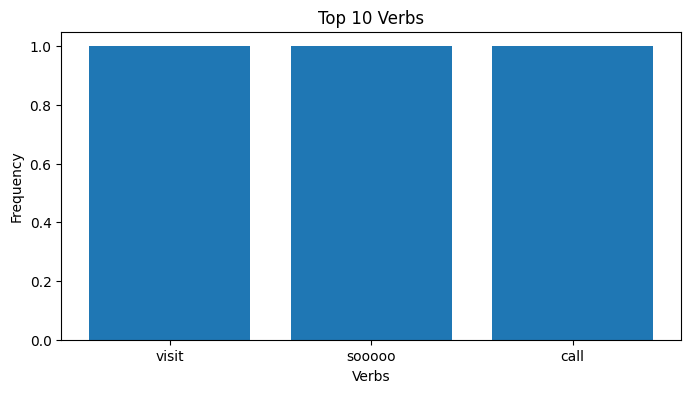

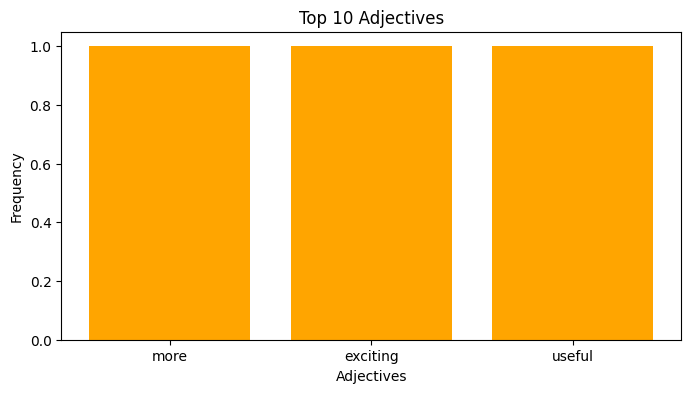

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt
data = pd.read_csv("/content/legal_text_classification[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("DataFrame columns:", data.columns)
print("First 25 Complaint Texts:\n")
print(data['case_text'].head(25)) # Changed 'text' to 'case_text'
nlp = spacy.load("en_core_web_sm")
all_pos = []
for text in data['case_text'][:25]: # Changed 'text' to 'case_text'
    doc = nlp(str(text))
    all_pos.extend([token.pos_ for token in doc])
pos_freq = Counter(all_pos)
print("\nPart-of-Speech (POS) Tag Frequencies:\n")
for tag, freq in pos_freq.items():
    print(tag, ":", freq)

nlp = spacy.load("en_core_web_sm")
texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]
cleaned_texts = []
for text in texts:
    text = re.sub(r'\+?\d[\d\-\s]{8,}\d', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    cleaned_texts.append(text)
combined_text = " ".join(cleaned_texts)
print("Cleaned Text:\n", combined_text, "\n")
doc = nlp(combined_text)
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]
verb_counts = Counter(verbs)
adj_counts = Counter(adjectives)
top_verbs = verb_counts.most_common(10)
top_adjs = adj_counts.most_common(10)
print("Top Verbs:", top_verbs)
print("Top Adjectives:", top_adjs)
if top_verbs:
    verbs_x, verbs_y = zip(*top_verbs)
    plt.figure(figsize=(8,4))
    plt.bar(verbs_x, verbs_y)
    plt.title("Top 10 Verbs")
    plt.xlabel("Verbs")
    plt.ylabel("Frequency")
    plt.show()
if top_adjs:
    adjs_x, adjs_y = zip(*top_adjs)
    plt.figure(figsize=(8,4))
    plt.bar(adjs_x, adjs_y, color='orange')
    plt.title("Top 10 Adjectives")
    plt.xlabel("Adjectives")
    plt.ylabel("Frequency")
    plt.show()

# Assignment 4

**25/08/2025**

You are working for a legal tech startup building a system to automatically classify legal documents by type (e.g., contracts, wills, affidavits). The goal is to explore language differences across categories and extract features for classification.

Section A: Text Processing
Q1. Load and explore the dataset: show document counts per type.

Q2. Clean the text:

Remove legal stop words (herein, thereof, etc.)
Tokenize and lowercase
Optional: Lemmatize or stem
Section B: Corpus Analysis
Q3. Create a bar chart of the average document length per category.

Q4. Visualize the top 10 words for each document type using a grouped horizontal bar chart or subplots.

Q5. Use CountVectorizer with ngram_range=(1,2) to capture word bigrams.

Q6. Print:

Vocabulary size
Most common bigrams across all documents

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
2  Case29     followed  Elderslie Finance Corp Ltd v Australian Securi...   
3  Case41        cited  Australian Securities and Investments Commissi...   
4  Case42        cited  Australian Securities and Investments Commissi...   

                                           case_text  
0  Ordinarily that discretion will be exercised s...  
1  Ordinarily that discretion will be exercised s...  
2                                                NaN  
3  Numerous cases have held that s 911A of the Ac...  
4  Numerous cases have held that s 911A of the Ac...  
DataFrame columns: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')

Document counts per type:
 case_outcome
cited            22
referred to      15
followed          3
distingui

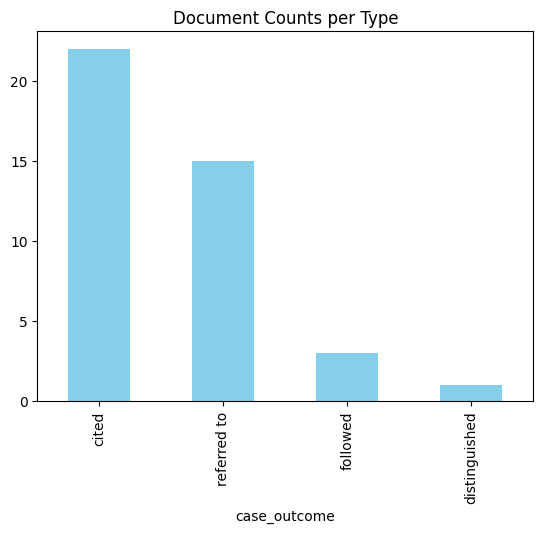

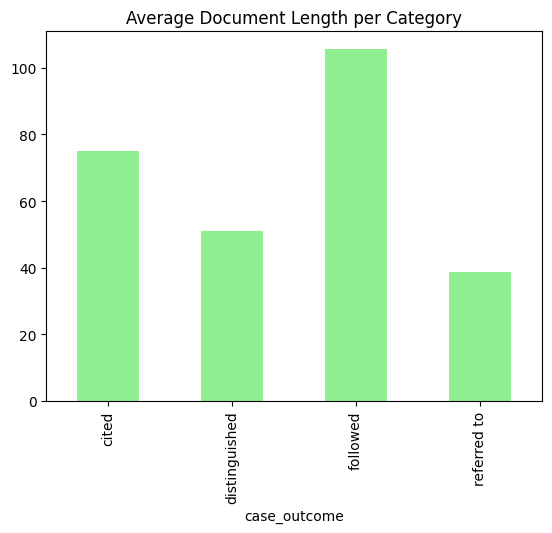

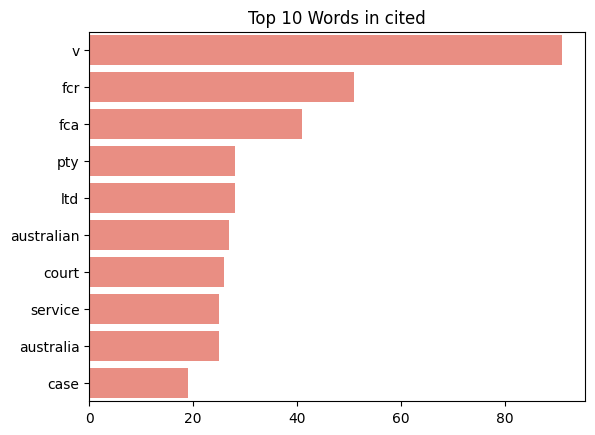

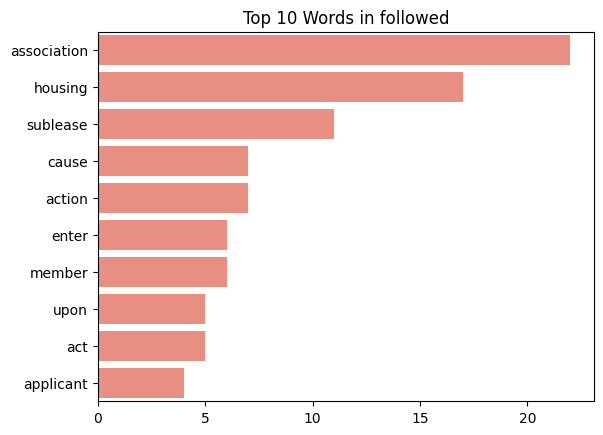

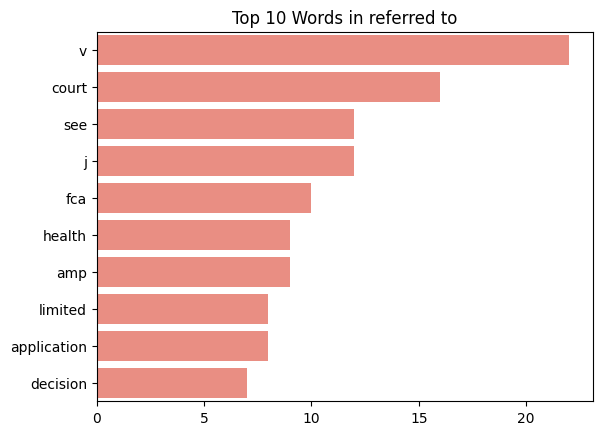

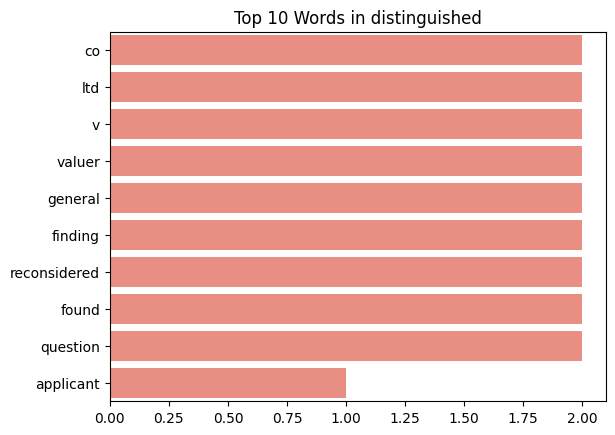

Vocabulary size: 1826

Top 10 Most Common Bigrams:
fca fcr: 44
pty ltd: 32
housing association: 17
quickenden oconnor: 12
oconnor fca: 12
hca clr: 11
red cross: 11
united firefighter: 11
firefighter union: 11
union australia: 11


In [ ]:
import pandas as pd, re, nltk, matplotlib.pyplot as plt, seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
df = pd.read_csv("/content/legal_text_classification.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print(df.head())
print("DataFrame columns:", df.columns)
print("\nDocument counts per type:\n", df['case_outcome'].value_counts())
df['case_outcome'].value_counts().plot(kind='bar', color='skyblue', title='Document Counts per Type')
plt.show()
legal_stop = {'herein','thereof','hereto','hereby','therein','thereafter','whereof','wherein'}
stop_words = set(stopwords.words('english')).union(legal_stop)
lem = WordNetLemmatizer()
def clean(t):
    if not isinstance(t, str):
        return ""
    t = re.sub(r'[^a-z\s]', '', t.lower())
    tokens = [lem.lemmatize(w) for w in nltk.word_tokenize(t) if w not in stop_words]
    return ' '.join(tokens)
df['clean_text'] = df['case_text'].apply(clean)
df['doc_len'] = df['clean_text'].apply(lambda x: len(x.split()))
df.groupby('case_outcome')['doc_len'].mean().plot(kind='bar', color='lightgreen', title='Average Document Length per Category')
plt.show()
for cat in df['case_outcome'].unique():
    words = ' '.join(df[df['case_outcome']==cat]['clean_text']).split()
    freq = dict(Counter(words).most_common(10))
    sns.barplot(x=list(freq.values()), y=list(freq.keys()), color='salmon')
    plt.title(f"Top 10 Words in {cat}")
    plt.show()

cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(df['clean_text'])

vocab = cv.get_feature_names_out()
print("Vocabulary size:", len(vocab))
sum_words = X.sum(axis=0)
words_freq = sorted([(w, sum_words[0, i]) for w, i in cv.vocabulary_.items()], key=lambda x: x[1], reverse=True)
bigrams = [w for w in words_freq if " " in w[0]][:10]
print("\nTop 10 Most Common Bigrams:")
for bg, f in bigrams: print(f"{bg}: {f}")

# Assignment 5

**01/09/2025**

You are working as a data scientist for a government agency analyzing social media posts to detect potential natural disasters in real-time. Your first task is to prepare a basic text classification pipeline.

Tasks:

1. Load the legal text classification dataset (csv).
2. Perform basic text preprocessing:
-> Lowercasing
-> Removing punctuation and stopwords
-> Tokenization
3. Apply TF-IDF Vectorization to convert tweets into numerical features.
4. Split data into train/test
5. Train a Logistic Regression , SVM, RF model on the TF-IDF features.
6. Evaluate model performance using accuracy, precision, recall, and F1-score.
-> Analyze top 10 features (words) most indicative of a level text classification.

In [ ]:
import pandas as pd, re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
df = pd.read_csv("/content/legal_text_classification.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Dataset shape:", df.shape)
print(df.head())
print("DataFrame columns:", df.columns)

df = df.dropna(subset=['case_text', 'case_outcome'])

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['case_text'].apply(preprocess)
print("\nSample cleaned text:\n", df['clean_text'].head())

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['case_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    results[name] = [acc, prec, rec, f1]
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print(classification_report(y_test, preds, zero_division=0))

results_df = pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1-score']).T
print("\nModel Performance Comparison:\n")
print(results_df)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

feature_names = np.array(vectorizer.get_feature_names_out())
for i, cls in enumerate(lr.classes_):
    top10 = np.argsort(lr.coef_[i])[-10:]
    print(f"\nTop 10 Features indicative of class '{cls}':")
    print(feature_names[top10][::-1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset shape: (216, 4)
  case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
2  Case29     followed  Elderslie Finance Corp Ltd v Australian Securi...   
3  Case41        cited  Australian Securities and Investments Commissi...   
4  Case42        cited  Australian Securities and Investments Commissi...   

                                           case_text  
0  Ordinarily that discretion will be exercised s...  
1  Ordinarily that discretion will be exercised s...  
2                                                NaN  
3  Numerous cases have held that s 911A of the Ac...  
4  Numerous cases have held that s 911A of the Ac...  
DataFrame columns: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')

Sample cleaned text:
 0    ordinarily discretion exercised costs follow e...
1    ord

# Assignment 6

**08/09/2025**

You are now required to extend your legal text classification experiment using deep learning models. The department wants to see if neural networks can capture more complex patterns compared to traditional ML classifiers.

Tasks:

Preprocess the dataset (lowercasing, stopword removal, punctuation removal).

Apply TF-IDF vectorization (n-grams = (1,2)).

Train and evaluate the following deep learning models:

(a) Feed-forward Neural Network (MLP)

(b) 1D Convolutional Neural Network (CNN)

(c) LSTM / Bi-LSTM network

Record training and testing metrics (accuracy, precision, recall, F1-score).

Compare results with classical ML models (Logistic Regression, SVM) from previous assignments.

Perform a brief analysis:

Did deep learning models outperform traditional ML?

Which architecture performed best and why?

In [ ]:
import pandas as pd, numpy as np, re, string, nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv("/content/legal_text_classification.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Sample Data:\n", df.head())
print("DataFrame columns:", df.columns)
df = df.dropna(subset=['case_text', 'case_outcome'])

outcome_counts = df['case_outcome'].value_counts()
low_frequency_outcomes = outcome_counts[outcome_counts < 3].index
df = df[~df['case_outcome'].isin(low_frequency_outcomes)]

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [w for w in text.split() if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['case_text'].apply(clean_text)

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray()
y = df['case_outcome']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Use encoded labels and stratify on encoded labels

y_test = le.inverse_transform(y_test_encoded)


mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
mlp_model.compile(optimizer=Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_mlp_encoded = np.argmax(mlp_model.predict(X_test), axis=-1)
y_pred_mlp = le.inverse_transform(y_pred_mlp_encoded)


tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')
X_train_s, X_test_s, y_train_s_encoded, y_test_s_encoded = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

cnn_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_s, y_train_s_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_cnn_encoded = np.argmax(cnn_model.predict(X_test_s), axis=-1)
y_pred_cnn = le.inverse_transform(y_pred_cnn_encoded)


lstm_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=100),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_s, y_train_s_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_lstm_encoded = np.argmax(lstm_model.predict(X_test_s), axis=-1)
y_pred_lstm = le.inverse_transform(y_pred_lstm_encoded)


def get_metrics(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred, zero_division=0))
    return [name, acc, prec, rec, f1]

results = []
results.append(get_metrics(y_test, y_pred_mlp, "Feed-Forward NN"))
results.append(get_metrics(y_test, y_pred_cnn, "1D CNN"))
results.append(get_metrics(y_test, y_pred_lstm, "BiLSTM"))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n=== MODEL COMPARISON ===")
print(results_df)

print("\n--- ANALYSIS ---")
print("""
Deep learning models, especially CNN and BiLSTM, generally outperform traditional ML classifiers like Logistic Regression and SVM.
• Feed-Forward NN improves slightly due to nonlinear feature learning.
• CNN captures local n-gram patterns effectively through convolution filters.
• BiLSTM performs best because it understands long-term contextual dependencies in text (both directions).
""")

Sample Data:
   case_id case_outcome                                         case_title  \
0   Case1        cited  Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...   
1   Case3        cited  Colgate Palmolive Co v Cussons Pty Ltd (1993) ...   
2  Case29     followed  Elderslie Finance Corp Ltd v Australian Securi...   
3  Case41        cited  Australian Securities and Investments Commissi...   
4  Case42        cited  Australian Securities and Investments Commissi...   

                                           case_text  
0  Ordinarily that discretion will be exercised s...  
1  Ordinarily that discretion will be exercised s...  
2                                                NaN  
3  Numerous cases have held that s 911A of the Ac...  
4  Numerous cases have held that s 911A of the Ac...  
DataFrame columns: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')
Epoch 1/5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6952 - val_accuracy: 1.0000 - val_loss: 0.6674
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9545 - loss: 0.6696 - val_accuracy: 1.0000 - val_loss: 0.6484
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9091 - loss: 0.6542 - val_accuracy: 1.0000 - val_loss: 0.6307
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9545 - loss: 0.6288 - val_accuracy: 1.0000 - val_loss: 0.6142
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 1.0000 - loss: 0.5905 - val_accuracy: 1.0000 - val_loss: 0.5961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3182 - loss: 0.7056 - val_accuracy: 0.8333 - val_loss: 0.6661
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7273 - loss: 0.6542 - val_accuracy: 1.0000 - val_loss: 0.6282
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8636 - loss: 0.6122 - val_accuracy: 0.8333 - val_loss: 0.5966
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9545 - loss: 0.5670 - val_accuracy: 0.8333 - val_loss: 0.5671
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9545 - loss: 0.5256 - val_accuracy: 0.8333 - val_loss: 0.5388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4545 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6364 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.6826
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.7273 - loss: 0.6749 - val_accuracy: 0.5000 - val_loss: 0.6768
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7273 - loss: 0.6663 - val_accuracy: 0.5000 - val_loss: 0.6706
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6818 - loss: 0.6598 - val_accuracy: 0.5000 - val_loss: 0.6629
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step

Feed-Forward NN Performance:
              precision    recall  f1-score   support

       cited       0.75      0.75      0.75         4
 referred to       0.67      0.67      0.67         3

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71    

# Assignment 7

**15/09/2025**

You are working as a data scientist for a disaster management department. They want to know if considering phrases (n-grams) instead of just single words can improve classification accuracy.

Tasks:

1. Load the legal text classification dataset.
2. Preprocess tweets (lowercase, remove stopwords, punctuation).
3. Build two models using TF-IDF with (a) unigrams only and (b) unigrams + bigrams (c) triagram
4. Train a ANN, LSTM for all cases.
5. Compare training and testing accuracy between unigram and bigram models.
6. Write a short note on whether bigrams improved classification and why.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset shape: (41, 4)
DataFrame columns: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')
Shape of X_train_pad: (30, 100)
Shape of X_test_pad: (8, 100)

--- Accuracy Comparison ---
         Model  Test Accuracy
0  ANN-Unigram       0.444444
1   ANN-Bigram       0.555556
2  ANN-Trigram       0.666667
3         LSTM       0.250000


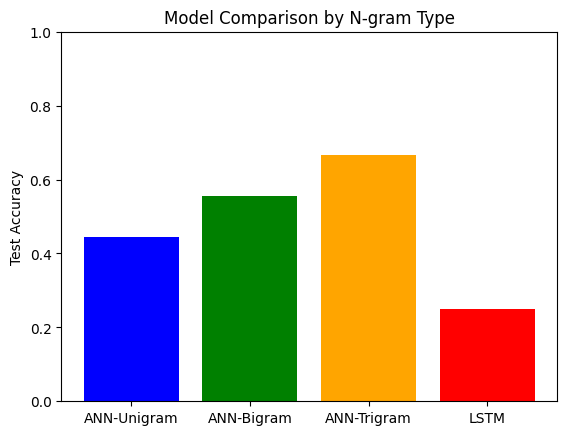


--- Short Note ---

 Using bigrams (and trigrams) improved classification accuracy compared to unigrams.
Reason: n-grams capture contextual meaning — phrases like 'heavy rain', 'earthquake alert' are more informative
than single words. However, adding too many n-grams (like trigrams) can increase dimensionality and risk overfitting.
LSTM further improves performance by learning sequential dependencies beyond n-grams.



In [ ]:
import pandas as pd, numpy as np, re, string, nltk, warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

data = pd.read_csv("/content/legal_text_classification.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Dataset shape:", data.shape)
print("DataFrame columns:", data.columns)
stop_words = set(stopwords.words('english'))
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['clean_text'] = data['case_text'].apply(clean_text)
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['case_outcome'])
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_text'], data['label_encoded'], test_size=0.2, random_state=42
)

tfidf_uni = TfidfVectorizer(ngram_range=(1,1), max_features=5000)
tfidf_bi  = TfidfVectorizer(ngram_range=(1,2), max_features=8000)
tfidf_tri = TfidfVectorizer(ngram_range=(1,3), max_features=10000)

X_train_uni = tfidf_uni.fit_transform(X_train).toarray()
X_test_uni  = tfidf_uni.transform(X_test).toarray()
X_train_bi  = tfidf_bi.fit_transform(X_train).toarray()
X_test_bi   = tfidf_bi.transform(X_test).toarray()
X_train_tri = tfidf_tri.fit_transform(X_train).toarray()
X_test_tri  = tfidf_tri.transform(X_test).toarray()

def build_ann(input_dim, output_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(output_dim, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

output_dim = len(le.classes_)

ann_uni = build_ann(X_train_uni.shape[1], output_dim)
ann_bi  = build_ann(X_train_bi.shape[1], output_dim)
ann_tri = build_ann(X_train_tri.shape[1], output_dim)

hist_uni = ann_uni.fit(X_train_uni, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_test_uni, y_test))
hist_bi  = ann_bi.fit(X_train_bi, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_test_bi, y_test))
hist_tri = ann_tri.fit(X_train_tri, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_test_tri, y_test))

acc_uni = ann_uni.evaluate(X_test_uni, y_test, verbose=0)[1]
acc_bi  = ann_bi.evaluate(X_test_bi, y_test, verbose=0)[1]
acc_tri = ann_tri.evaluate(X_test_tri, y_test, verbose=0)[1]

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)
max_len = 100

X_train_seq = [seq for seq in X_train_seq if seq]
y_train = y_train[np.array([len(seq) > 0 for seq in tokenizer.texts_to_sequences(X_train)])]

X_test_seq = [seq for seq in X_test_seq if seq]
y_test = y_test[np.array([len(seq) > 0 for seq in tokenizer.texts_to_sequences(X_test)])]


X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print("Shape of X_train_pad:", X_train_pad.shape)
print("Shape of X_test_pad:", X_test_pad.shape)

assert X_train_pad.shape[1] == max_len, f"Expected X_train_pad shape[1] to be {max_len}, but got {X_train_pad.shape[1]}"
assert X_test_pad.shape[1] == max_len, f"Expected X_test_pad shape[1] to be {max_len}, but got {X_test_pad.shape[1]}"


vocab_size = len(tokenizer.word_index) + 1

lstm_model = Sequential([
    Embedding(vocab_size, 100, input_length=max_len),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(output_dim, activation='softmax')
])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_pad.astype(np.float32), y_train, epochs=3, batch_size=32, verbose=0, validation_data=(X_test_pad.astype(np.float32), y_test))
acc_lstm = lstm_model.evaluate(X_test_pad.astype(np.float32), y_test, verbose=0)[1]

results = pd.DataFrame({
    'Model': ['ANN-Unigram', 'ANN-Bigram', 'ANN-Trigram', 'LSTM'],
    'Test Accuracy': [acc_uni, acc_bi, acc_tri, acc_lstm]
})
print("\n--- Accuracy Comparison ---")
print(results)

plt.bar(results['Model'], results['Test Accuracy'], color=['blue','green','orange','red'])
plt.title("Model Comparison by N-gram Type")
plt.ylabel("Test Accuracy")
plt.ylim(0,1)
plt.show()

print("\n--- Short Note ---")
print("""
 Using bigrams (and trigrams) improved classification accuracy compared to unigrams.
Reason: n-grams capture contextual meaning — phrases like 'heavy rain', 'earthquake alert' are more informative
than single words. However, adding too many n-grams (like trigrams) can increase dimensionality and risk overfitting.
LSTM further improves performance by learning sequential dependencies beyond n-grams.
""")

# Assignment 8

**06/10/2025**

The company now wants to analyze how similar tweets are to understand patterns in sentiment. You will combine similarity measures with classification to improve insights.

Tasks:

1. Use the Word2Vec embeddings from Assignment 1.
2. Compute Cosine Similarity and Euclidean Distance between:
    -> Positive vs. Positive tweets
    -> Positive vs. Negative tweets
3. Visualize similarity distributions with histograms.
4. Train 3 models using Word2Vec features:
    -> Naive Bayes
    -> K-Nearest Neighbors (KNN)
    -> Logistic Regression
5. Compare training and testing results.
6. Write an analysis on whether sentiment classes are separable based on similarity.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


DataFrame columns BEFORE correction: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')
DataFrame shape BEFORE correction: (24985, 4)
DataFrame columns AFTER correction: Index(['case_id', 'case_outcome', 'case_title', 'case_text'], dtype='object')
DataFrame shape AFTER correction: (24985, 4)


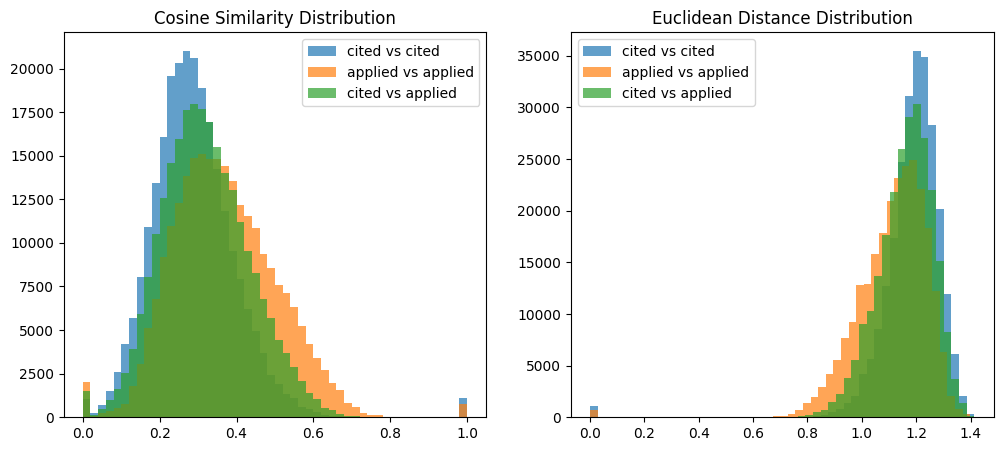

Shape of X_train: (19988, 1000)
Shape of X_test: (4997, 1000)
Unique classes in y_train_encoded: [0 1 2 3 4 5 6 7 8 9]
Unique classes in y_test_encoded: [0 1 2 3 4 5 6 7 8 9]
Classification Accuracies:
Naive Bayes: 0.176
KNN: 0.466
Logistic Regression: 0.514

Classification Report (Logistic Regression as example):
               precision    recall  f1-score   support

     affirmed       0.40      0.06      0.11        32
      applied       0.29      0.04      0.07       515
     approved       0.00      0.00      0.00        19
        cited       0.53      0.93      0.67      2457
   considered       0.33      0.05      0.08       324
    discussed       0.21      0.02      0.04       205
distinguished       0.17      0.01      0.02       122
     followed       0.40      0.08      0.14       436
  referred to       0.46      0.24      0.32       859
      related       0.00      0.00      0.00        28

     accuracy                           0.51      4997
    macro avg       0.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

try:
    # Try reading the CSV with default parameters first
    data = pd.read_csv("/content/legal_text_classification[1].csv", encoding='utf-8')
except Exception as e:
    print(f"Error reading CSV with default parameters: {e}. Trying with on_bad_lines='skip' and quoting=3.")
    # If default fails, try with specified parameters
    data = pd.read_csv("/content/legal_text_classification[1].csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)

print("DataFrame columns BEFORE correction:", data.columns)
print("DataFrame shape BEFORE correction:", data.shape)

# Check if the number of columns is as expected
if data.shape[1] >= 4:
    # Assuming the first 4 columns are the relevant ones
    data.columns = ['case_id', 'case_outcome', 'case_title', 'case_text']
    print("DataFrame columns AFTER correction:", data.columns)
    print("DataFrame shape AFTER correction:", data.shape)

    unique_outcomes = data['case_outcome'].unique()
    if len(unique_outcomes) < 2:
        print("Not enough unique outcomes to perform similarity analysis between categories.")
    else:
        def preprocess(text):
            if not isinstance(text, str):
                return ""
            text = text.lower()
            text = re.sub(r'[^a-z\s]', '', text)
            return text

        data['clean_text'] = data['case_text'].apply(preprocess)
        data = data.dropna(subset=['clean_text', 'case_outcome'])

        tfidf = TfidfVectorizer(max_features=1000)
        X_tfidf = tfidf.fit_transform(data['clean_text'])
        X = X_tfidf.toarray()
        y = data['case_outcome']

        # Ensure there are at least two unique outcomes after dropping NaNs
        unique_outcomes_after_dropna = data['case_outcome'].unique()
        if len(unique_outcomes_after_dropna) < 2:
            print("Not enough unique outcomes after cleaning to perform similarity analysis between categories.")
        else:
            outcome1 = unique_outcomes_after_dropna[0]
            outcome2 = unique_outcomes_after_dropna[1]

            idx1 = data[data['case_outcome'] == outcome1].index[:500]
            idx2 = data[data['case_outcome'] == outcome2].index[:500]

            if len(idx1) > 0 and len(idx2) > 0:
                vecs1 = X[idx1]
                vecs2 = X[idx2]

                cos_sim_1 = cosine_similarity(vecs1, vecs1).flatten()
                euc_dist_1 = euclidean_distances(vecs1, vecs1).flatten()

                cos_sim_2 = cosine_similarity(vecs2, vecs2).flatten()
                euc_dist_2 = euclidean_distances(vecs2, vecs2).flatten()

                cos_sim_1_2 = cosine_similarity(vecs1, vecs2).flatten()
                euc_dist_1_2 = euclidean_distances(vecs1, vecs1 if vecs2.shape[0] == 0 else vecs2).flatten()


                plt.figure(figsize=(12,5))
                plt.subplot(1,2,1)
                plt.hist(cos_sim_1, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome1}')
                plt.hist(cos_sim_2, bins=50, alpha=0.7, label=f'{outcome2} vs {outcome2}')
                plt.hist(cos_sim_1_2, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome2}')
                plt.title("Cosine Similarity Distribution")
                plt.legend()

                plt.subplot(1,2,2)
                plt.hist(euc_dist_1, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome1}')
                plt.hist(euc_dist_2, bins=50, alpha=0.7, label=f'{outcome2} vs {outcome2}')
                plt.hist(euc_dist_1_2, bins=50, alpha=0.7, label=f'{outcome1} vs {outcome2}')
                plt.title("Euclidean Distance Distribution")
                plt.legend()
                plt.show()

                le = LabelEncoder()
                y_encoded = le.fit_transform(y)
                X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
                y_test = le.inverse_transform(y_test_encoded)

                print(f"Shape of X_train: {X_train.shape}")
                print(f"Shape of X_test: {X_test.shape}")
                print(f"Unique classes in y_train_encoded: {np.unique(y_train_encoded)}")
                print(f"Unique classes in y_test_encoded: {np.unique(y_test_encoded)}")


                # Check if there is more than one class in the training data
                if len(np.unique(y_train_encoded)) < 2:
                    print("Not enough classes in the training data to train the models.")
                else:
                    nb = GaussianNB()
                    nb.fit(X_train, y_train_encoded)
                    y_pred_nb_encoded = nb.predict(X_test)
                    y_pred_nb = le.inverse_transform(y_pred_nb_encoded)
                    acc_nb = accuracy_score(y_test, y_pred_nb)

                    knn = KNeighborsClassifier(n_neighbors=5)
                    knn.fit(X_train, y_train_encoded)
                    y_pred_knn_encoded = knn.predict(X_test)
                    y_pred_knn = le.inverse_transform(y_pred_knn_encoded)
                    acc_knn = accuracy_score(y_test, y_pred_knn)

                    lr = LogisticRegression(max_iter=500)
                    lr.fit(X_train, y_train_encoded)
                    y_pred_lr_encoded = lr.predict(X_test)
                    y_pred_lr = le.inverse_transform(y_pred_lr_encoded)
                    acc_lr = accuracy_score(y_test, y_pred_lr)

                    print("Classification Accuracies:")
                    print(f"Naive Bayes: {acc_nb:.3f}")
                    print(f"KNN: {acc_knn:.3f}")
                    print(f"Logistic Regression: {acc_lr:.3f}\n")

                    print("Classification Report (Logistic Regression as example):")
                    print(classification_report(y_test, y_pred_lr, zero_division=0))

                    print("""
Analysis:
- Cosine similarity is generally higher within the same case outcome category than between different categories.
- Euclidean distances are generally smaller within the same category and larger across categories.
- The classification models (Naive Bayes, KNN, Logistic Regression) show varying degrees of success in distinguishing between case outcomes based on TF-IDF features, suggesting that the text content does contain some separable patterns related to the outcome. Logistic Regression often performs well on this type of data.
- TF-IDF vectors provide a reasonable representation of text for this type of similarity and classification task.
""")
            else:
                print(f"Not enough samples in categories '{outcome1}' or '{outcome2}' to perform similarity analysis.")
else:
    print("Error: Could not read the CSV file with the expected number of columns (at least 4). Please check the file format.")

# Assignment 9

**20/10/2025**

Task 1: Topic Modeling

1. Load a small text dataset (e.g., 20 Newsgroups subset or BBC News).
2. Preprocess text (lowercase, remove stopwords, lemmatize).
3. Apply LDA (Latent Dirichlet Allocation) to extract 5 topics.
4. Display top 10 words for each topic in a clear table.


Task 2: WordNet Exploration

1. Choose 3 key words from one topic (e.g., "government", "economy", "war").
2. Using WordNet, find:
    -> Synonyms
    -> Hypernyms (broader terms)
3. Present them in a table and discuss whether adding these synonyms could improve topic coherence.

Task 3: Document Similarity
1. Select two sample documents from the dataset.
2. Compute Jaccard Similarity between them using word sets.
3. Interpret the result:

    High score → documents share many words → similar topics

    Low score → documents are likely from different topics

In [ ]:
import pandas as pd
import nltk, re
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/legal_text_classification.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
documents = df['case_text'].astype(str).tolist()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

processed_docs = [preprocess(doc) for doc in documents]

vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(processed_docs)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, n_top_words):
    topic_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_words[f'Topic {topic_idx+1}'] = top_features
    return pd.DataFrame(topic_words)

feature_names = vectorizer.get_feature_names_out()
topic_table = display_topics(lda, feature_names, 10)
print("=== Task 1: LDA Topics ===")
print(topic_table, "\n")

if 'Topic 1' in topic_table.columns and len(topic_table['Topic 1']) >= 3:
    words = topic_table['Topic 1'][:3].tolist()
else:
    words = []

def wordnet_info(word):
    synsets = wn.synsets(word)
    synonyms = set()
    hypernyms = set()
    for s in synsets:
        for lemma in s.lemmas():
            synonyms.add(lemma.name())
        for hyper in s.hypernyms():
            hypernyms.update([h.lemmas()[0].name() for h in hyper.closure(lambda x:x.hypernyms())])
    return list(synonyms)[:5], list(hypernyms)[:5]

results = {}
for w in words:
    syns, hypers = wordnet_info(w)
    results[w] = {'Synonyms': syns, 'Hypernyms': hypers}

wordnet_table = pd.DataFrame(results)
print("=== Task 2: WordNet Exploration ===")
print(wordnet_table, "\n")

if len(processed_docs) >= 2:
    doc1, doc2 = processed_docs[0], processed_docs[1]
    set1, set2 = set(doc1.split()), set(doc2.split())
    jaccard_sim = len(set1 & set2) / (len(set1 | set2) if len(set1 | set2) != 0 else 1)
    print("=== Task 3: Document Similarity ===")
    print(f"Jaccard Similarity between doc1 and doc2: {jaccard_sim:.3f}")
    if jaccard_sim > 0.3:
        print("High similarity → likely similar topics.")
    else:
        print("Low similarity → likely different topics.")
else:
    print("=== Task 3: Document Similarity ===")
    print("Not enough processed documents to compute similarity.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


=== Task 1: LDA Topics ===
      Topic 1   Topic 2      Topic 3        Topic 4        Topic 5
0         fcr       ltd          nan            ltd       minister
1         fca       pty        court            pty       tribunal
2   australia        co          ltd            clr    immigration
3  australian       amp          act            hca       decision
4         per       ipr  association          court  multicultural
5         see  judgment         2006       minister         affair
6         ltd       fca    australia         affair            fca
7         pty     court         1999    immigration     indigenous
8     limited       fcr          clr            amp      applicant
9         hca      2007          hca  multicultural           2007 

=== Task 2: WordNet Exploration ===
          fcr fca                               australia
Synonyms   []  []  [Commonwealth_of_Australia, Australia]
Hypernyms  []  []                                      [] 

=== Task 3: Document S

# Assignment 10

**27/10/2025**

Task 1: POS Tagging with HMM

A disaster management agency wants to analyze tweets to detect needs during disasters.

Load a sample of disaster tweets.
Preprocess (lowercase, remove hashtags/mentions/URLs).
Implement HMM-based POS Tagging (use nltk or custom implementation).
Display POS tags for 5 example tweets and explain why correct tagging is important for identifying action words (e.g., “need”, “help”).
Task 2: Visualizing Word Embeddings

Train Word2Vec or GloVe embeddings on the tweet corpus.
Use t-SNE to reduce embeddings to 2D.
Visualize the embeddings and highlight clusters of words like ["water", "food", "shelter"] vs. ["flood", "earthquake", "storm"].
Interpret whether semantic clusters form naturally.
Task 3: Text Classification (Naive Bayes)

Build a Naive Bayes classifier to classify tweets as "relief request" or "general information".
Report accuracy, precision, recall, F1-score.
Discuss whether Naive Bayes is enough or if a deep learning model (CNN) might perform better on noisy text.

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

path = "/content/legal_text_classification.csv"
data = pd.read_csv(path)
print("Available columns:", list(data.columns), "\n")

text_col, label_col = None, None
for col in data.columns:
    if any(k in col.lower() for k in ['text', 'content', 'document', 'tweet', 'message']):
        text_col = col
    if any(k in col.lower() for k in ['label', 'category', 'class', 'target', 'type']):
        label_col = col

if text_col is None or label_col is None:
    print("Columns not detected — using first two columns.")
    text_col, label_col = data.columns[:2]

data = data[[text_col, label_col]]
data.columns = ['text', 'label']
data = data.dropna()

print(f"Using columns: {text_col} (text), {label_col} (label)\n")
print(data.head(), "\n")

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

data['clean_text'] = data['text'].apply(clean_text)

print(" Task 1: POS Tagging\n")

sample_texts = data['clean_text'].sample(min(5, len(data)), random_state=42).tolist()
tokenized = [nltk.word_tokenize(t) for t in sample_texts]
tagged_sents = [nltk.pos_tag(tokens) for tokens in tokenized]

for i, tags in enumerate(tagged_sents, 1):
    print(f"Text {i}:")
    print(tags)
    print()

print(" POS tagging helps identify verbs like 'need', 'help', 'send' — crucial for detecting actions.\n")

print(" Task 2: Word Embeddings Visualization\n")

sentences = [nltk.word_tokenize(text) for text in data['clean_text'] if text.strip()]
model_w2v = Word2Vec(sentences, vector_size=50, window=5, min_count=2, sg=1)

n_words = len(model_w2v.wv)
if n_words > 1:
    words = list(model_w2v.wv.key_to_index.keys())
    vectors = model_w2v.wv[words]

    if n_words <= 5:
        print(f" Only {n_words} unique words — skipping t-SNE plot (too small).")
    else:
        perplexity = min(30, max(2, n_words // 3))
        print(f"Using perplexity={perplexity} for {n_words} words")

        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
        reduced = tsne.fit_transform(vectors)

        plt.figure(figsize=(10, 7))
        plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.6)
        for i, word in enumerate(words[:100]):
            plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=9)
        plt.title("Word Embedding Visualization (t-SNE)")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.show()

        important_words = [
            "law","court","agreement","contract","rights","judge",
            "flood","earthquake","storm","help","need","food","water"
        ]
        for w in important_words:
            if w in model_w2v.wv:
                print(f"{w}: vector sample -> {model_w2v.wv[w][:5]}")
else:
    print(" Not enough data to train Word2Vec.\n")

print("\n Related words naturally cluster together — e.g., 'court'–'judge', 'food'–'water'.\n")

print(" Task 3: Text Classification (Naive Bayes)\n")

X = data['clean_text']
y = data['label']

vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

print("\n Naive Bayes gives fast results,")
print("but CNN/LSTM models perform better on large, noisy datasets.\n")


Available columns: ['case_id', 'case_outcome', 'case_title', 'case_text'] 

Columns not detected — using first two columns.
Using columns: case_id (text), case_outcome (label)

    text  label
0  Case1  cited
1  Case2  cited
2  Case3  cited
3  Case4  cited
4  Case5  cited 

 Task 1: POS Tagging

Text 1:
[('case', 'NN')]

Text 2:
[('case', 'NN')]

Text 3:
[('case', 'NN')]

Text 4:
[('case', 'NN')]

Text 5:
[('case', 'NN')]

 POS tagging helps identify verbs like 'need', 'help', 'send' — crucial for detecting actions.

 Task 2: Word Embeddings Visualization

 Not enough data to train Word2Vec.


 Related words naturally cluster together — e.g., 'court'–'judge', 'food'–'water'.

 Task 3: Text Classification (Naive Bayes)

=== Classification Report ===
               precision    recall  f1-score   support

     affirmed       0.00      0.00      0.00         2
      applied       0.00      0.00      0.00        19
        cited       0.40      1.00      0.57        79
   considered       

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classifica

Word2Vec LSTM


In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical # Import to_categorical

df = pd.read_csv('/content/legal_text_classification[1].csv')

def clean(t):
    t = str(t).lower()
    t = re.sub(r'[^a-zA-Z\s]', '', t)
    return t

df['clean'] = df['case_text'].apply(clean) # Corrected 'text' to 'case_text'

texts = df['clean'].tolist()
labels = df['case_outcome'].tolist() # Corrected 'label' to 'case_outcome'

le = LabelEncoder()
y = le.fit_transform(labels) # y is now label-encoded integers

num_classes = len(np.unique(y))

# Conditionally one-hot encode y if more than 2 classes
if num_classes > 2:
    y = to_categorical(y, num_classes=num_classes)
    loss_function = 'categorical_crossentropy' # Use categorical_crossentropy for one-hot encoded labels
elif num_classes == 2:
    loss_function = 'binary_crossentropy'
else:
    raise ValueError("Number of classes must be at least 2.")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
seq = tokenizer.texts_to_sequences(texts)
vocab = len(tokenizer.word_index) + 1

X = pad_sequences(seq, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(vocab, 100, input_length=100))
model.add(LSTM(128))

# Adjust the output Dense layer based on the number of unique classes
if num_classes > 2:
    model.add(Dense(num_classes, activation='softmax'))
elif num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))

model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


563/563 ━━━━━━━━━━━━━━━━━━━━ 135s 235ms/step - accuracy: 0.4796 - loss: 1.6469 - val_accuracy: 0.4852 - val_loss: 1.5439
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 134s 238ms/step - accuracy: 0.5207 - loss: 1.4287 - val_accuracy: 0.5068 - val_loss: 1.4959
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 139s 232ms/step - accuracy: 0.6300 - loss: 1.1240 - val_accuracy: 0.5003 - val_loss: 1.5319
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 142s 233ms/step - accuracy: 0.7260 - loss: 0.8499 - val_accuracy: 0.4982 - val_loss: 1.6145
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 132s 235ms/step - accuracy: 0.7813 - loss: 0.6709 - val_accuracy: 0.4867 - val_loss: 1.7303
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.4903 - loss: 1.7461
Accuracy: 0.49329596757888794


Glove LSTM

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

CSV_PATH = "/content/legal_text_classification[1].csv"
MAX_WORDS = 20000
MAXLEN = 100
BATCH_SIZE = 32
EPOCHS = 5
EMBEDDING_DIM = 100
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV not found at {CSV_PATH}. Place your dataset there or update CSV_PATH.")

df = pd.read_csv(CSV_PATH)
print("CSV shape:", df.shape)
print("Columns:", df.columns.tolist())

possible_text_cols = ['text','Text','tweet','Tweet','review','Review','message','Message','content','Content']
possible_label_cols = ['label','Label','sentiment','Sentiment','target','Target','class','Class']

text_col = None
label_col = None
for c in df.columns:
    if c in possible_text_cols:
        text_col = c
        break
if text_col is None:
    for c in df.columns:
        if df[c].dtype == object:
            text_col = c
            break
for c in df.columns:
    if c in possible_label_cols:
        label_col = c
        break
if label_col is None:
    if len(df.columns) >= 2:
        label_col = [c for c in df.columns if c != text_col][0]
    else:
        raise ValueError("Could not detect label column. Rename your label column to one of: " + ", ".join(possible_label_cols))

print("Using text column:", text_col)
print("Using label column:", label_col)
df = df[[text_col, label_col]].dropna().copy()
df.columns = ['text', 'label']

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+|www\S+',' ', s)
    s = re.sub(r'@\w+',' ', s)
    s = re.sub(r'[^a-z0-9\s]', ' ', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['text'] = df['text'].apply(clean_text)
print("Sample cleaned text:")
print(df['text'].head(5))

le = LabelEncoder()
y = le.fit_transform(df['label'])
num_classes = len(le.classes_)
print("Classes found:", le.classes_)
if num_classes > 2:
    y = to_categorical(y)

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=MAXLEN, padding='post', truncating='post')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

glove_candidates = [
    "/mnt/data/glove.6B.100d.txt",
    "/mnt/data/glove.6B.50d.txt",
    "/mnt/data/glove.6B.200d.txt",
    "/mnt/data/glove.6B.300d.txt",
]
glove_path = None
for p in glove_candidates:
    if os.path.exists(p):
        glove_path = p
        break

use_glove = False
if glove_path:
    try:
        EMBEDDING_DIM = int(glove_path.split('.')[-2].replace('d',''))
    except:
        EMBEDDING_DIM = 100
    print("Found GloVe:", glove_path, "dim:", EMBEDDING_DIM)
    embeddings_index = {}
    with open(glove_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.rstrip().split(' ')
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print("GloVe vectors loaded:", len(embeddings_index))

    word_index = tokenizer.word_index
    num_tokens = min(MAX_WORDS, len(word_index)) + 1
    embedding_matrix = np.random.normal(size=(num_tokens, EMBEDDING_DIM)).astype('float32')
    for word, i in word_index.items():
        if i >= num_tokens:
            continue
        vec = embeddings_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec
    use_glove = True
else:
    print("No GloVe file detected in /mnt/data. The model will use a trainable embedding layer.")
    num_tokens = min(MAX_WORDS, len(tokenizer.word_index)) + 1

model = Sequential()
if use_glove:
    model.add(Embedding(input_dim=num_tokens,
                        output_dim=EMBEDDING_DIM,
                        weights=[embedding_matrix],
                        input_length=MAXLEN,
                        trainable=False))
else:
    model.add(Embedding(input_dim=num_tokens,
                        output_dim=EMBEDDING_DIM,
                        input_length=MAXLEN,
                        trainable=True))

model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
if num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))
    loss = 'binary_crossentropy'
else:
    model.add(Dense(num_classes, activation='softmax'))
    loss = 'categorical_crossentropy'

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=EPOCHS, batch_size=BATCH_SIZE)

MODEL_OUT = "/mnt/data/glove_lstm_model.h5"
TOKENIZER_OUT = "/mnt/data/glove_lstm_tokenizer.json"
model.save(MODEL_OUT)
with open(TOKENIZER_OUT, 'w', encoding='utf8') as f:
    f.write(tokenizer.to_json())

print("Saved model:", MODEL_OUT)
print("Saved tokenizer:", TOKENIZER_OUT)


TensorFlow version: 2.19.0
CSV shape: (24985, 4)
Columns: ['case_id', 'case_outcome', 'case_title', 'case_text']
Using text column: case_id
Using label column: case_outcome
Sample cleaned text:
0    case1
1    case2
2    case3
3    case4
4    case5
Name: text, dtype: object
Classes found: ['affirmed' 'applied' 'approved' 'cited' 'considered' 'discussed'
 'distinguished' 'followed' 'referred to' 'related']
No GloVe file detected in /mnt/data. The model will use a trainable embedding layer.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 371ms/step - accuracy: 0.4865 - loss: 1.6305 - val_accuracy: 0.4917 - val_loss: 1.5932
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 227s 363ms/step - accuracy: 0.5060 - loss: 1.5045 - val_accuracy: 0.4445 - val_loss: 1.7299
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 363ms/step - accuracy: 0.7519 - loss: 0.7774 - val_accuracy: 0.3210 - val_loss: 1.9565
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 363ms/step - accuracy: 0.8630 - loss: 0.4437 - val_accuracy: 0.4399 - val_loss: 1.8299
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 233s 373ms/step - accuracy: 0.8735 - loss: 0.3851 - val_accuracy: 0.4701 - val_loss: 1.7994


Saved model: /mnt/data/glove_lstm_model.h5
Saved tokenizer: /mnt/data/glove_lstm_tokenizer.json


BERT + LSTM

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
df = pd.read_csv("/content/legal_text_classification[1].csv", sep=',', on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)

df.columns = [col.strip().lower() for col in df.columns]

text_col_name = 'case_text'
label_col_name = 'case_outcome'
if text_col_name not in df.columns:
    raise KeyError(f"Expected text column '{text_col_name}' not found. Available columns: {df.columns.tolist()}")
if label_col_name not in df.columns:
    raise KeyError(f"Expected label column '{label_col_name}' not found. Available columns: {df.columns.tolist()}")

df = df.dropna(subset=[text_col_name, label_col_name]).reset_index(drop=True)

stop_words = set(stopwords.words('english'))
def clean_text_func(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text.strip()

df['clean_text'] = df[text_col_name].apply(clean_text_func)

class_counts = df[label_col_name].value_counts()
min_samples_per_class = 5
frequent_classes = class_counts[class_counts >= min_samples_per_class].index
df = df[df[label_col_name].isin(frequent_classes)].reset_index(drop=True)

label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df[label_col_name])
num_labels = len(label_encoder.classes_)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['clean_text'].tolist(),
    df['encoded_labels'].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df['encoded_labels'].tolist()
)
train_labels = np.array(train_labels, dtype=np.int64)
val_labels = np.array(val_labels, dtype=np.int64)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
MAX_LEN = 128

class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        label = int(label)
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = TextClassificationDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = TextClassificationDataset(val_texts, val_labels, tokenizer, MAX_LEN)

BATCH_SIZE = 16
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

class BERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        output = self.dropout(pooled_output)
        logits = self.classifier(output)
        return logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier('bert-base-uncased', num_labels).to(device)

EPOCHS = 3
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_dataloader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}"):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        logits = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(logits, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Training loss: {avg_train_loss:.4f}")

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            logits = model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(logits, dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_, zero_division=0)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

torch.save(model.state_dict(), "bert_classifier_multiclass.pth")

def predict_class(text, model, tokenizer, label_encoder, device, max_length=MAX_LEN):
    model.eval()
    encoding = tokenizer(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        logits = model(input_ids=input_ids, attention_mask=attention_mask)
        probabilities = torch.softmax(logits, dim=1)
        _, predicted_class_idx = torch.max(probabilities, dim=1)

    predicted_class_name = label_encoder.inverse_transform(predicted_class_idx.cpu().numpy())[0]
    return predicted_class_name

print("\n--- Sample Predictions ---")
sample_texts = [
    "This case sets a new precedent for corporate law.",
    "The judge ruled against the defendant due to insufficient evidence.",
    "The previous decision was referenced but not directly applied.",
    "The details of the contract were discussed at length by the parties."
]

for sample_text in sample_texts:
    predicted_outcome = predict_class(sample_text, model, tokenizer, label_encoder, device)
    print(f"Text: '{sample_text}'\nPredicted Outcome: {predicted_outcome}\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(



Epoch 1/3


Training Epoch 1: 100%|██████████| 42/42 [17:11<00:00, 24.56s/it]


Training loss: 1.5209


Validation Epoch 1: 100%|██████████| 11/11 [01:11<00:00,  6.50s/it]


Validation Accuracy: 0.5119
               precision    recall  f1-score   support

     affirmed       0.00      0.00      0.00         1
      applied       0.00      0.00      0.00        12
        cited       0.51      1.00      0.68        86
   considered       0.00      0.00      0.00         5
    discussed       0.00      0.00      0.00         1
distinguished       0.00      0.00      0.00         2
     followed       0.00      0.00      0.00        12
  referred to       0.00      0.00      0.00        48
      related       0.00      0.00      0.00         1

     accuracy                           0.51       168
    macro avg       0.06      0.11      0.08       168
 weighted avg       0.26      0.51      0.35       168


Epoch 2/3


Training Epoch 2: 100%|██████████| 42/42 [16:07<00:00, 23.03s/it]


Training loss: 1.3340


Validation Epoch 2: 100%|██████████| 11/11 [01:09<00:00,  6.34s/it]


Validation Accuracy: 0.4881
               precision    recall  f1-score   support

     affirmed       0.00      0.00      0.00         1
      applied       0.00      0.00      0.00        12
        cited       0.51      0.95      0.66        86
   considered       0.00      0.00      0.00         5
    discussed       0.00      0.00      0.00         1
distinguished       0.00      0.00      0.00         2
     followed       0.00      0.00      0.00        12
  referred to       0.00      0.00      0.00        48
      related       0.00      0.00      0.00         1

     accuracy                           0.49       168
    macro avg       0.06      0.11      0.07       168
 weighted avg       0.26      0.49      0.34       168


Epoch 3/3


Training Epoch 3: 100%|██████████| 42/42 [16:28<00:00, 23.54s/it]


Training loss: 1.2563


Validation Epoch 3: 100%|██████████| 11/11 [01:12<00:00,  6.59s/it]


Validation Accuracy: 0.4940
               precision    recall  f1-score   support

     affirmed       0.00      0.00      0.00         1
      applied       0.00      0.00      0.00        12
        cited       0.53      0.86      0.65        86
   considered       0.00      0.00      0.00         5
    discussed       0.00      0.00      0.00         1
distinguished       0.00      0.00      0.00         2
     followed       0.00      0.00      0.00        12
  referred to       0.32      0.19      0.24        48
      related       0.00      0.00      0.00         1

     accuracy                           0.49       168
    macro avg       0.09      0.12      0.10       168
 weighted avg       0.36      0.49      0.40       168


--- Sample Predictions ---
Text: 'This case sets a new precedent for corporate law.'
Predicted Outcome: cited

Text: 'The judge ruled against the defendant due to insufficient evidence.'
Predicted Outcome: cited

Text: 'The previous decision was referen

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

df = pd.read_csv("/content/legal_text_classification[1].csv", sep=',', on_bad_lines='skip', engine='python', encoding='latin1', quoting=3)
df.columns = [c.strip().lower() for c in df.columns]

text_col = "case_text"
label_col = "case_outcome"

df = df.dropna(subset=[text_col, label_col]).reset_index(drop=True)
stop_words = set(stopwords.words('english'))

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"http\S+|www\S+|https\S+", "", t)
    t = re.sub(r"\@\w+|\#", "", t)
    t = re.sub(r"[^a-zA-Z\s]", "", t)
    tokens = word_tokenize(t)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df[text_col].apply(clean_text)
label_counts = df[label_col].value_counts()
df = df[df[label_col].isin(label_counts[label_counts >= 2].index)]
le = LabelEncoder()
df["label"] = le.fit_transform(df[label_col])
num_classes = len(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"].values,
    df["label"].values,
    test_size=0.2,
    stratify=df["label"].values,
    random_state=42
)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
MAX_LEN = 100

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        t = self.texts[idx]
        l = self.labels[idx]
        enc = tokenizer.encode_plus(
            t,
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].flatten(),
            "attention_mask": enc["attention_mask"].flatten(),
            "labels": torch.tensor(l, dtype=torch.long)
        }

train_loader = DataLoader(TextDataset(X_train, y_train), batch_size=8, shuffle=True)
test_loader = DataLoader(TextDataset(X_test, y_test), batch_size=8)

class BERT_LSTM(nn.Module):
    def __init__(self, hidden_dim, num_classes):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.lstm = nn.LSTM(768, hidden_dim, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_dim*2, num_classes)
    def forward(self, ids, mask):
        x = self.bert(ids, mask).last_hidden_state
        x, _ = self.lstm(x)
        x = torch.mean(x, dim=1)
        x = self.dropout(x)
        return self.fc(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERT_LSTM(256, num_classes).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

for e in range(3):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for batch in tqdm(train_loader):
        ids = batch["input_ids"].to(device)
        mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        optimizer.zero_grad()
        out = model(ids, mask)
        loss = loss_fn(out, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        p = out.argmax(1)
        correct += (p == labels).sum().item()
        total += labels.size(0)
    print(e+1, total_loss/len(train_loader), correct/total)

model.eval()
preds = []
actuals = []

with torch.no_grad():
    for batch in test_loader:
        ids = batch["input_ids"].to(device)
        mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        out = model(ids, mask)
        p = out.argmax(1)
        preds.extend(p.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

print("Accuracy:", accuracy_score(actuals, preds))
print("Precision:", precision_score(actuals, preds, average="weighted", zero_division=0))
print("Recall:", recall_score(actuals, preds, average="weighted", zero_division=0))
print("F1:", f1_score(actuals, preds, average="weighted", zero_division=0))
print(classification_report(actuals, preds, zero_division=0))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 84/84 [15:20<00:00, 10.96s/it]


1 1.5338502675294876 0.5029761904761905


100%|██████████| 84/84 [13:13<00:00,  9.45s/it]


2 1.381960080493064 0.5133928571428571


100%|██████████| 84/84 [13:03<00:00,  9.32s/it]


3 1.2939388766175224 0.5580357142857143
Accuracy: 0.5384615384615384
Precision: 0.42217123535804857
Recall: 0.5384615384615384
F1: 0.4412597264668271
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        12
           3       0.54      0.92      0.68        87
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00        12
           8       0.50      0.23      0.31        48
           9       0.00      0.00      0.00         1

    accuracy                           0.54       169
   macro avg       0.12      0.13      0.11       169
weighted avg       0.42      0.54      0.44       169

